<a href="https://colab.research.google.com/github/me-smishra27/Ted-Talks-Views-Prediction/blob/main/Ted_Talk_Views_Prediction_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font size="+3" color='#053c96'><b> About this Project </b></font>

This is a Machine Learning Capstone Project ,

done for completion of the AlmaBetter Premium Program ,

<b> AlmaBetter School , Bengaluru India</b>


This Project is done by :

* Hariom Bharadwaj
* Shivam Mishra
* Mayank Kumar
* Sarvesh Yadav
* Saifuddin Raja








#<font size="+3" color='#053c96'><b> Problem Statement</b></font>

TED is devoted to spreading powerful ideas on just about any topic. This dataset contain over 4,005 TED talks including transcripts in many languages.
 
Founded in 1984 by Richard Salman as a nonprofit organization 
that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. 

TED talks have been given for many years with the platform of "Ideas Worth Spreading". In the digital world we live in today, TED is a great platform to get your idea out there. But how do you know if your idea will be heard or appreciated.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

#<font size="+3" color='#053c96'><b> The Structure of this notebook</b></font>


#**Project Work flow**

---

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion
--- 

* About this Project
* Problem Statement
* Bussiness Goal
* Approach Taken in this Project
  * Understanding the given Data

* Initial Code : Initliaing the Data and Modules
  * Installing and Importing Libraries
  * Import Dataset and Initial Data Checks

* Data Preparation and Cleaning
* Exploratory Data Analysis
  * Initial Macro-Level Data Analysis
  * Variable wise EDA

  * Correlation Plot for Numeric Features
* Data Preprocessing and Feature Engineering
	* Outlier Treatment in feature
	* Label Encoding
	* One Hot Encoding

* Building Prediction Systems using ML Models
	* Import cleaned final data

	* Random Forrests of Decsision Trees
		* Default Parameters : RandomForestRegressor
		* Base Estimator Generator Function
		* HyperParameter tuning using GridSearchCV
		* Final Training Run
	* Gradient Boosted Trees using XGBoost Library
		* XGBoost algorithn training and tuning notes
		* XGBoost Estimator Instance Generator Function
		* HyperParameter tuning using GridSearchCV
		* Final Training Run for XGBoost
		* Feature Importance
	* Categorical Gradient Boosted Trees using CatBoost Library
		* CatBoost Estimator Instance Generator Function
		* Model Evaluation
		* Final Training Run for CatBoost
		* Feature Importance

* Inferences and Conclusions
* What Worked? What Did Not Work?
* Future Work and More Ideas to Explore
	* Custom Metric , based on Cost of approaching te customer , so as to create

#<font size="+3" color='#053c96'><b> Understanding the given Data</b></font>


For each feature in the given dataset , 

What is the meaning of the feature and its data type

#<font size="+3" color='#053c96'><b> Initial Code : Initliaing the Data and Modules </b></font>

> Indented block



---
##<font size="+2" color='#053c96'><b> Installing and Importing Libraries</b></font>

### Libraries used in this Project:

Datawrangling : 
* Numpy
* Pandas

For Graphing : 
* Matplotib
* Seaborn 

Machine learning :
* Scikit-Learn
* SK-Opt
* XGBoost
* CatBoost

Miscellaneous :
* Google colab tools

# Importing few libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
pd.plotting.register_matplotlib_converters()
import calendar

### <font size="+3" color='#053c96'>Importing ML Libraries:</font>

In [ ]:
!pip install scikit-optimize
!pip install catboost

In [ ]:
import sklearn

from sklearn.model_selection import ShuffleSplit , StratifiedKFold , RepeatedStratifiedKFold ,train_test_split
from sklearn.model_selection import cross_val_score , cross_validate ,cross_val_predict

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix as confmat
from sklearn.metrics import precision_recall_curve , classification_report

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath='/content/drive/MyDrive/AlmaBetter/Capston Project 3 Ted Talk Analysis/Code/Data/data_ted_talks.csv'
dataset1=pd.read_csv(filepath)

In [ ]:
#data copy
data=dataset.copy()



`

<b> #<font size="+3" color='#053c96'><b> Dataset Information: </b></font>

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary
result = resumetable(data)

Dataset Shape: (4005, 19)


In [ ]:
# Printing the dataset
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
# Summary about dataset
result.sort_values('Missing', ascending= False)

,Name,dtypes,Missing,Uniques,First Value,Second Value
12,comments,float64,655,601,272,628
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
0,talk_id,int64,0,4005,1,92
17,description,object,0,4005,With the same humor and humanity he exuded in ...,You've never seen data presented like this. Wi...
16,url,object,0,4005,https://www.ted.com/talks/al_gore_averting_the...,https://www.ted.com/talks/hans_rosling_the_bes...
15,related_talks,object,0,4005,"{243: 'New thinking on the climate crisis', 54...","{2056: ""Own your body's data"", 2296: 'A visual..."
14,topics,object,0,3977,"['alternative energy', 'cars', 'climate change...","['Africa', 'Asia', 'Google', 'demo', 'economic..."


#Result
The above information gives the Dataset summary:

1)With datatypes of each feature.

2)With Missing values Information of each feature of our Dataset.

3)With unique values count of each feature.



**Dataset is loaded. So, let's go with EDA on features.**

#**3.Exploratory Data Analysis**

In [ ]:
#printing the shape of the dataset.
data.shape

(4005, 19)

In [ ]:
dataset=data.copy()

In [ ]:
dataset['talk_id'].nunique()/(len(dataset))

1.0

There are missing value in the data
By looking at the info of the dataset we can get a rough idea on the numeric and the string columns
By looking at the summary of the data we can infer the mean,standard deviation, min and max of the
We will be able to get an idea about the outliers here by the percentiles

In [ ]:
dataset.describe(percentiles = [.25,.50,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,52465.80,60751.60,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,6182301.40,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,531.65,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,1230.80,1601.12,3922.0


#Description of all our numerical feature with count,mean,std and min.

##**Visualization Part**

# Visualization for numerical parts

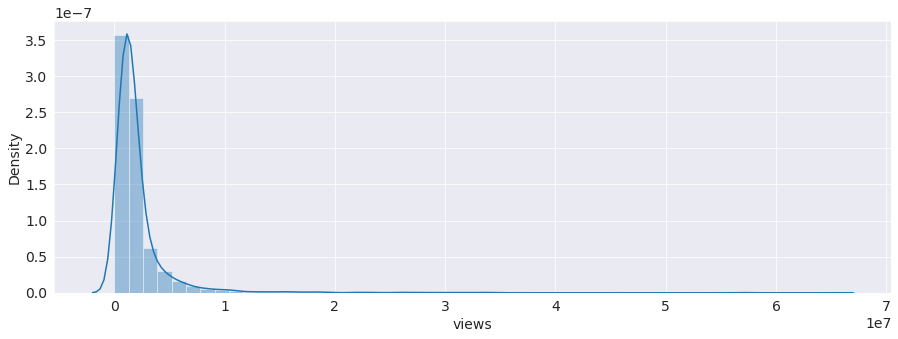

In [ ]:
#visualizing the distplot of views:
plt.figure(figsize=(15,5))
sns.distplot(data['views'])

* **As shown from the graph 'views' feature  is positively skewed.**




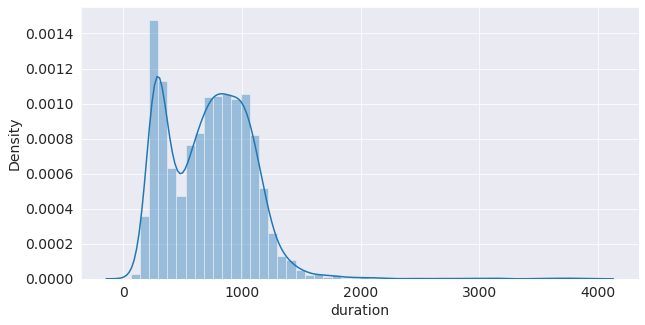

In [ ]:
#visualization of duration
plt.figure(figsize=(10,5))
sns.distplot(data['duration'])

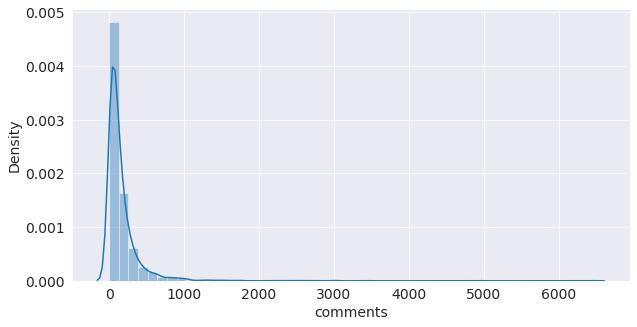

In [ ]:
##visualization of the comments
plt.figure(figsize=(10,5))
sns.distplot(data['comments'])

#All the numerical features are positively skewed.

#**4.Data Preprocessing and Feature Engineering**



Feature engineering is an informal topic, but one that is absolutely known and agreed to be key to success in applied machine learning.

# Adding a daily views column for further analysis:

# Formatting Datetime type:

In [ ]:
# importing Datetime
from datetime import datetime
import calendar
# Setting the Datetime formate: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2021-09-12'

In [ ]:
# Recorded date fromate:
data['recorded_date']= pd.to_datetime(data['recorded_date'])
# Formating the published date time:
data['published_date']= pd.to_datetime(data['published_date'])

# Period of day's talk has been published:
last_publishing_date = data['published_date'].max()

data['time_since_published'] = last_publishing_date - pd.DatetimeIndex(data['published_date'])

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
import datetime
data['month'] = pd.DatetimeIndex(data['published_date']).month
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data['year'] = pd.DatetimeIndex(data['published_date']).year
data['day'] = pd.DatetimeIndex(data['published_date']).day
data['week_day']= data['published_date'].apply(lambda x: day_order[datetime.date(x.year, x.month, x.day).weekday()])


# Creating daily views column:

In [ ]:
# Daily views/Talk:
data['daily_views'] = data['views'] / ( data['time_since_published'].apply(lambda x : x.days) + 1 )

# Categarising Variable types:

data_categorical= data[['title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers',
       'native_lang', 'available_lang', 'comments', 'topics',
       'related_talks', 'url', 'description', 'transcript']]
data_numerical= data[['talk_id','views', 'duration']] 

data_target_variable= data[['views']]

# Bivariate Analysis of different features vs. target variable:

<b> Speaker_1 vs. daily_views:</b>

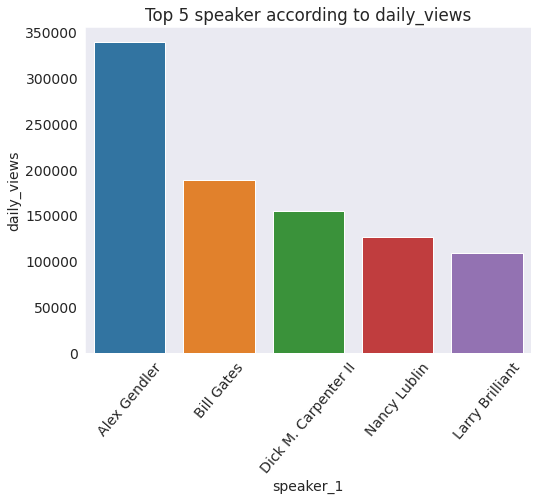

In [ ]:
#top 25 speakers
temp=data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

**From the Graph we can depict that:**

Alex Gendler is the most popular speaker according to Daily Views.

<b> speaker vs. talks delivered:</b>

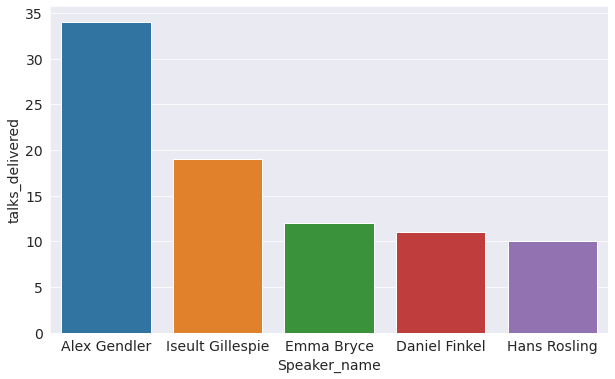

In [ ]:
# Speaker vs. talks delivered:
speaker_count = data['speaker_1'].value_counts().to_frame()
data_speaker_count = pd.DataFrame(speaker_count)
data_speaker_count = data_speaker_count.reset_index()
data_speaker_count.columns = ['Speaker_name', 'talks_delivered']
most_talks = data_speaker_count.nlargest(5, 'talks_delivered')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)

**From the graph we can say that :**

Alex gendler has delivered the most no. of talks or we can say that he is the most invited speaker at ted.

<b> speaker vs. duration</b>

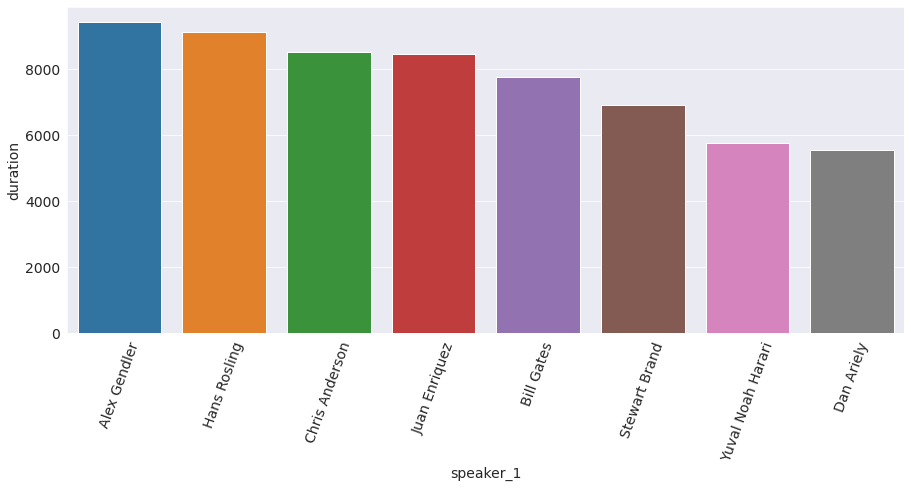

In [ ]:
temp=data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70);

**From the graph we can say that :**

Alex gendler has delivered the longest duration talk

<b> speaker1 vs. comments </b>

Text(0.5, 1.0, 'Most popular speaker according to views')

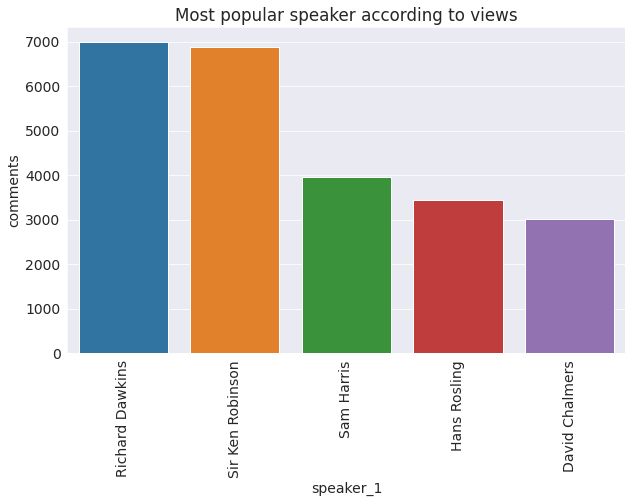

In [ ]:
temp=data.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=90);
plt.title('Most popular speaker according to views')

**Rich Dawkins and Sir Ken Robinson are Most popular speakers according to the comments**

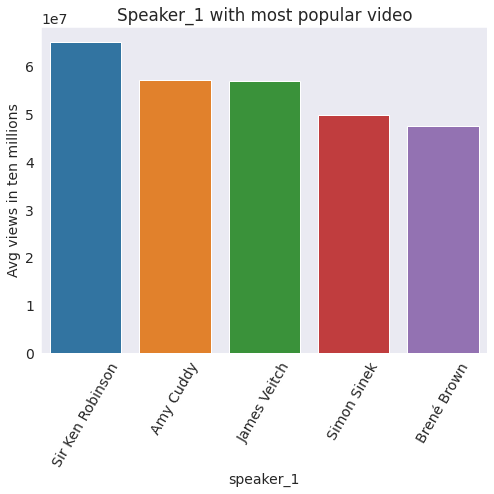

In [ ]:
# Speaker most popular video
temp=data[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

**Sir Ken Robinson is the mostt popular speaker views wise.**

# Applying target encoding on speaker1

In [ ]:
speaker=data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
data['speaker_1_avg_views']=data['speaker_1'].map(speaker)

#plot of speaker_1_avg_views:

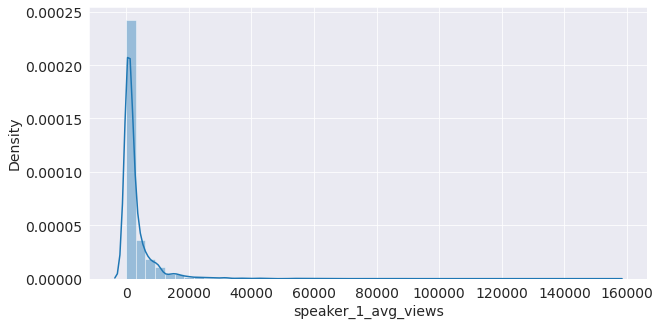

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['speaker_1_avg_views'])

#**Event**


##As event is also a categorical feature, we have done target encoding on it.




In [ ]:
event=data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
data['event_wise_avg_views']=data['event'].map(event)

# Plot of event_wise_avg_views

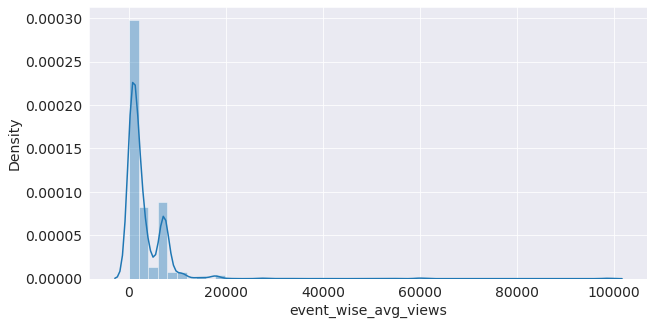

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['event_wise_avg_views'])

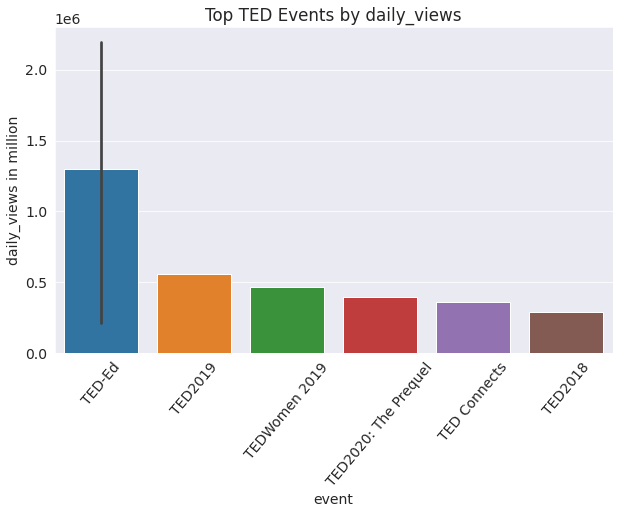

In [ ]:
temp=data.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

**From the graph we can depict that the most frequent event of TED is TED-ED**

In [ ]:
# plt.figure(figsize=(10,6))
# ax=sns.barplot(x='event',y='talk_id',data=temp)
# labels=ax.get_xticklabels()
# plt.title('Top TED Events by Average daily_views')
# plt.xlabel('Events')
# plt.ylabel('Avg daily_views in millions')

# plt.setp(labels, rotation=30);

In [ ]:
# temp=data.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
# plt.figure(figsize=(10,6))
# ax=sns.barplot(x='event',y='daily_views',data=temp)
# labels=ax.get_xticklabels()
# plt.title('Top TED Events by daily_views')
# plt.ylabel('daily_views in millions')
# plt.setp(labels, rotation=90);

#available_lang 

## Applying eval for casting on available_lang column:

In [ ]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'speaker_1_avg_views', 'event_wise_avg_views'],
      dtype='object')

# Density plot of available language column:

In [ ]:
data['number_of_lang'] = data['available_lang'].apply(lambda x: len(x))

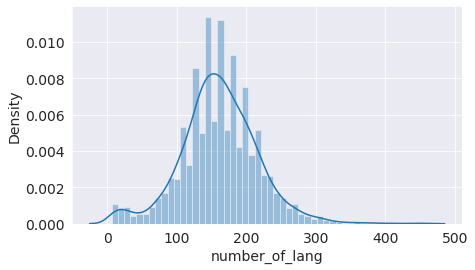

In [ ]:
sns.distplot(data['number_of_lang'])

<b> Topics</b>




In [ ]:
data['topics']

0       ['alternative energy', 'cars', 'climate change...
1       ['Africa', 'Asia', 'Google', 'demo', 'economic...
2       ['computers', 'entertainment', 'interface desi...
3       ['MacArthur grant', 'activism', 'business', 'c...
4       ['children', 'creativity', 'culture', 'dance',...
                              ...                        
4000    ['activism', 'data', 'technology', 'mental hea...
4001    ['TED-Ed', 'education', 'history', 'animation'...
4002    ['society', 'law', 'policy', 'justice system',...
4003    ['TED-Ed', 'education', 'animation', 'United S...
4004    ['animals', 'TED-Ed', 'animation', 'oceans', '...
Name: topics, Length: 4005, dtype: object

In [ ]:
data['topics'] = data.apply(lambda x: eval(x['topics']), axis=1)


** Number of topics 

In [ ]:
data['num_of_topics'] = data.apply(lambda x: len(x['topics']), axis=1)

# Density plot of num of topics:

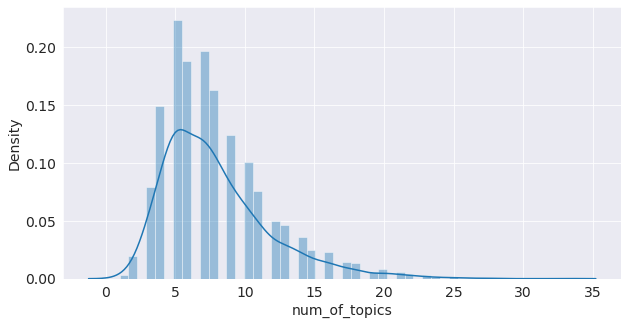

In [ ]:
# graph:
plt.figure(figsize=(10,5))
sns.distplot(data['num_of_topics'])

# Unique topics:

In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(data)):
  temp=data['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(data)):
    temp2=data['topics'][i]
    if(topic in temp2):
      temp+=data['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(data)):
  temp=0
  temp_topic=data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
data['topics_wise_avg_views'] = se.values

# Density plot for topic_wise_views:

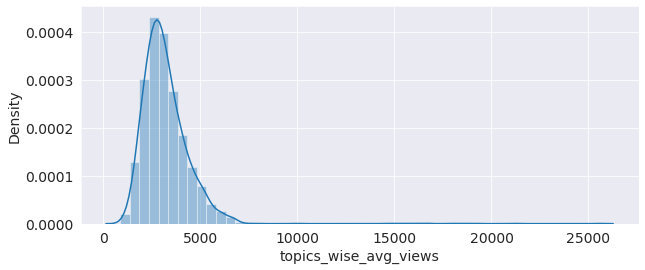

In [ ]:
# Graph:
plt.figure(figsize=(10,4))
sns.distplot(data['topics_wise_avg_views'])

# <b> related_talks column.</b>

In [ ]:
#applying eval function related talk column:
import ast
data['related_talks'] = data['related_talks'].apply(lambda x: ast.literal_eval(x))

# Related Talk

Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value.**
** taking mean of all realated talk videos views:

In [ ]:
#defining a new feature called related_views
data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(data)):
      if (data.loc[i,'talk_id']) in id_list:
        temp+=data.loc[i,'daily_views']

    data.loc[index,'related_views']=temp//6

# Density plot of realted_views:

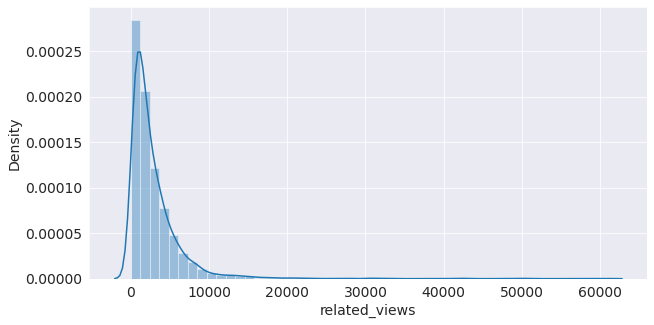

In [ ]:
#Graph of related_views column
plt.figure(figsize=(10,5))
sns.distplot(data['related_views'])

#**5. Data Cleaning.**

##**5.1 Outlier Treatment on numerical columns.**

Outliers are present in few columns which needs to be treated.
We are replacing the outliers with the mean values.

In [ ]:
# Aplying Outlier treatment on duration and number of Languages:

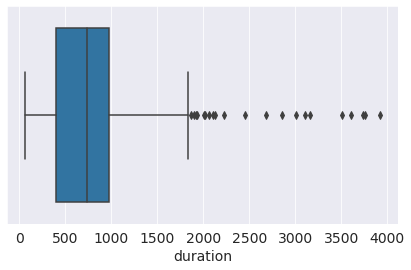

In [ ]:
sns.boxplot(data['duration'], data= data)


In [ ]:
data_duration_iqr=  data['duration'].quantile(0.75)-data['duration'].quantile(0.25)
data['duration']= data['duration'].mask(data['duration']>(data['duration'].quantile(0.75)+1.5*data_duration_iqr), data['duration'].mean())


In [ ]:
data.shape

(4005, 31)

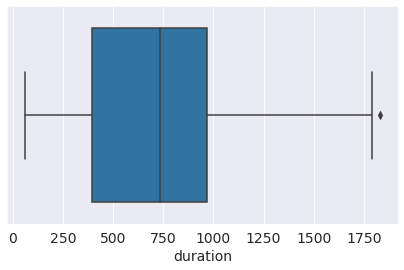

In [ ]:
sns.boxplot(data['duration'], data= data)

# Outlier treatment for Number of languages available: 

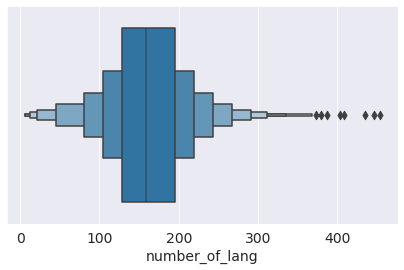

In [ ]:
sns.boxenplot(data['number_of_lang'], data= data)

In [ ]:
number_of_lang_iqr= (data['number_of_lang'].quantile(0.75))-(data['number_of_lang'].quantile(0.25))
data['number_of_lang']= data['number_of_lang'].mask(data['number_of_lang']>(data['number_of_lang'].quantile(0.75)+1.5*number_of_lang_iqr), data['number_of_lang'].mean())

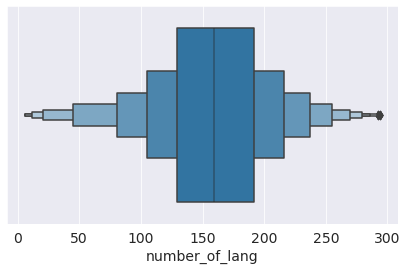

In [ ]:
sns.boxenplot(data['number_of_lang'], data= data)

* **Now, we don't have any outliers.**

In [ ]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics', 'topics_wise_avg_views',
       'related_views'],
      dtype='object')

# <b>Dataset For nlp</b>

In [ ]:
nlp_dataset= data.copy() 

In [ ]:
nlp_dataset.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics', 'topics_wise_avg_views',
       'related_views'],
      dtype='object')

In [ ]:
temp_data1 = nlp_dataset[['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'comments', 'duration', 'topics', 'related_talks', 'url',
       'description', 'transcript', 'time_since_published', 'month', 'year',
       'day', 'daily_views', 'speaker_1_avg_views', 'number_of_lang',
       'num_of_topics', 'topics_wise_avg_views', 'related_views']]

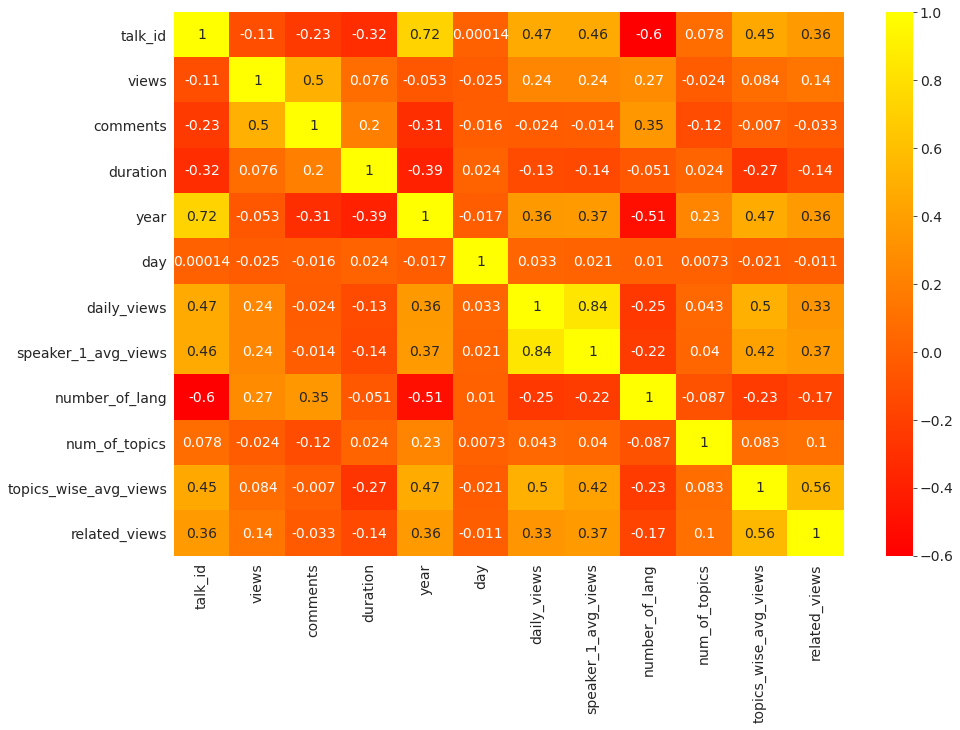

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(temp_data1.corr(), annot= True, cmap= "autumn",ax=ax)
# plt.figure(figsize=(10,8))


# Removing Irrelevant columns:


In [ ]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics', 'topics_wise_avg_views',
       'related_views'],
      dtype='object')

In [ ]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript',
     'topics_wise_avg_views', 'related_views']

In [ ]:
df=data.copy()

In [ ]:
df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,time_since_published,month,year,day,week_day,daily_views,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,topics_wise_avg_views,related_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5056 days,Jun,2006,27,Tue,696.735614,699.725014,782.72889,270.0,9,2432.0,3093.0


In [ ]:
#dropping unimportant columns from the datasets.
df.drop(columns=unwanted_features,inplace=True)

In [ ]:
# df.drop(columns= ['published_date'], inplace= True)

**Defining the dependent and independent variables.**

In [ ]:
#separating the dependent and independent variables
y=df['daily_views']
X=df.drop(columns='daily_views')

In [ ]:
X2=X

**Doing one hot encoding using get_dummies function.**

In [ ]:
X.columns


Index(['comments', 'duration', 'time_since_published', 'month', 'year', 'day',
       'week_day', 'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics'],
      dtype='object')

In [ ]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 28)

In [ ]:
X.head(2)

,comments,duration,time_since_published,year,day,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,272.0,977.0,5056 days,2006,27,699.725014,782.72889,270.000000,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,628.0,1190.0,5056 days,2006,27,1098.925286,782.72889,160.720599,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0



* **Applying proper feature selection is must here to get rid of unimportant features.**

##**5.2 Let's treat nan values of numerical columns using KNNImputer**

In [ ]:
#checking for null values
X[['duration','comments']].isna().sum()

duration      0
comments    655
dtype: int64

* **Comments has around 655 NaN values**



* **Let's treat it using KNNImputer.**

In [ ]:
#Taking features for using in KNNImputer
outlier_data=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

In [ ]:
# Before applying KNNImputer, we have to scale features so avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_data]))
# transform the dataset
X[outlier_data] = imputer.transform(scaler.fit_transform(X[outlier_data]))
#again applying inverse_transform on the data
X[outlier_data] = scaler.inverse_transform(X[outlier_data])

In [ ]:
# Checking Nan values:
X[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

* **Comments has no null values**

In [ ]:
X.head()

,comments,duration,time_since_published,year,day,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,272.0,977.0,5056 days,2006,27,699.725014,782.72889,270.000000,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,628.0,1190.0,5056 days,2006,27,1098.925286,782.72889,160.720599,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,124.0,1286.0,5056 days,2006,27,687.917181,782.72889,165.000000,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,219.0,1116.0,5056 days,2006,27,452.806229,782.72889,219.000000,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4931.0,1164.0,5056 days,2006,27,6453.203121,782.72889,160.720599,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


<b># Cleaned dataset</b>

In [ ]:
data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,time_since_published,month,year,day,week_day,daily_views,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,topics_wise_avg_views,related_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5056 days,Jun,2006,27,Tue,696.735614,699.725014,782.72889,270.000000,9,2432.0,3093.0
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190.0,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",5056 days,Jun,2006,27,Tue,2867.645837,1098.925286,782.72889,160.720599,11,2546.0,865.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   talk_id                4005 non-null   int64          
 1   title                  4005 non-null   object         
 2   speaker_1              4005 non-null   object         
 3   all_speakers           4001 non-null   object         
 4   occupations            3483 non-null   object         
 5   about_speakers         3502 non-null   object         
 6   views                  4005 non-null   int64          
 7   recorded_date          4004 non-null   datetime64[ns] 
 8   published_date         4005 non-null   datetime64[ns] 
 9   event                  4005 non-null   object         
 10  native_lang            4005 non-null   object         
 11  available_lang         4005 non-null   object         
 12  comments               3350 non-null   float64  

In [ ]:
data.describe(include= 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
talk_id,4005,NaN,NaN,NaN,NaT,NaT,12432.5,17447.6,1,1252,2333,23777,62794
title,4005,4005,A musical escape into a world of light and color,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speaker_1,4005,3274,Alex Gendler,34,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_speakers,4001,3306,{0: 'Alex Gendler'},34,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupations,3483,2049,{0: ['writer']},53,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,4005,NaN,NaN,NaN,NaT,NaT,2.14801e+06,3.45123e+06,0,882069,1.37551e+06,2.13311e+06,6.5052e+07
recorded_date,4004,1334,2017-04-24 00:00:00,97,1984-02-02,2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_date,4005,2962,2017-09-07 00:00:00,27,2006-06-27,2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,4005,459,TED-Ed,556,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns.values

array(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date',
       'event', 'native_lang', 'available_lang', 'comments', 'duration',
       'topics', 'related_talks', 'url', 'description', 'transcript',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics', 'topics_wise_avg_views',
       'related_views'], dtype=object)

In [ ]:
data.describe()

,talk_id,views,comments,duration,time_since_published,year,day,daily_views,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,topics_wise_avg_views,related_views
count,4005.000000,4.005000e+03,3350.000000,4005.000000,4005,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,713.837762,1923 days 16:18:41.797749856,2014.596754,15.212984,3103.617844,3103.617844,3103.617844,158.449236,7.915106,3208.539076,2888.834956
std,17447.576262,3.451226e+06,268.838922,329.259358,1446 days 09:32:04.389727216,3.991930,8.613515,7463.261324,6284.865529,5149.490183,51.538995,3.904362,1298.926245,3561.939651
min,1.000000,0.000000e+00,0.000000,60.000000,0 days 00:00:00,2006.000000,1.000000,0.000000,0.000000,21.282438,6.000000,1.000000,878.000000,0.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000,554 days 00:00:00,2011.000000,8.000000,417.693951,480.108540,704.246976,129.000000,5.000000,2433.000000,893.000000
50%,2333.000000,1.375508e+06,89.000000,732.000000,1675 days 00:00:00,2015.000000,15.000000,1060.176027,1168.038131,1499.333894,159.000000,7.000000,2999.000000,1891.000000
75%,23777.000000,2.133110e+06,188.000000,968.000000,3104 days 00:00:00,2018.000000,22.000000,2798.856540,3077.077592,3947.896101,192.000000,10.000000,3759.000000,3693.000000
max,62794.000000,6.505195e+07,6449.000000,1831.000000,5056 days 00:00:00,2020.000000,31.000000,166072.837838,154804.666667,98747.783730,294.000000,33.000000,25532.000000,60782.000000


# Cat boost

In [ ]:
import xgboost as xgb
xgb_model= xgb.XGBRegressor(objective="reg:squarederror")

In [ ]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics', 'topics_wise_avg_views',
       'related_views'],
      dtype='object')

In [ ]:
X= data[['duration',
       'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics', 'topics_wise_avg_views', 'year', 'day']]

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()

In [ ]:
X= Scaler.fit_transform(X)
y= Scaler.fit_transform(data['daily_views'].values.reshape(-1,1))

In [ ]:
X.shape

(4005, 8)

In [ ]:
y.shape

(4005, 1)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.20, random_state= 5)

In [ ]:
xgb_model.fit(X_train, y_train)

[15:57:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_r2_train=xgb_model.score(X_train, y_train)
xgb_r2_train

0.9491477883863317

In [ ]:
xgb_r2_test= xgb_model.score(X_test, y_test)
xgb_r2_test

0.8120309810306731

In [ ]:
xgb_y_train_pred= xgb_model.predict(X_train)
xgb_y_test_pred= xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mean_absolute_error(y_train,xgb_y_train_pred)

0.08549261935512241

In [ ]:
mean_absolute_error(y_test, xgb_y_test_pred)

0.11588391495715948

In [ ]:
import math

In [ ]:
xgb_rmse_train = math.sqrt(mean_squared_error(y_train,xgb_y_train_pred))
xgb_rmse_train

0.23200480607579269

In [ ]:
xgb_rmse_test = math.sqrt(mean_squared_error(y_test,xgb_y_test_pred))
xgb_rmse_test

0.37916236829200006

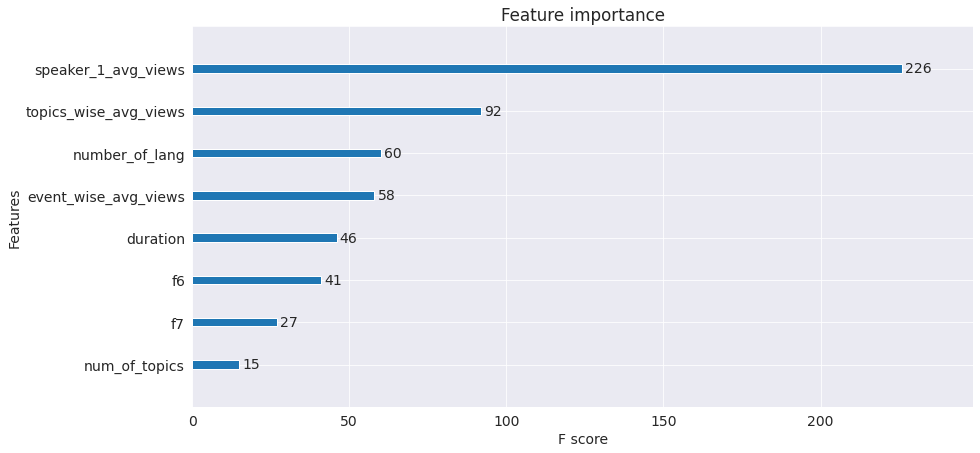

In [ ]:
# model = joblib.load("your_saved.model")
xgb_model.get_booster().feature_names = ['duration', 'speaker_1_avg_views', 'event_wise_avg_views','number_of_lang', 'num_of_topics', 'topics_wise_avg_views']
xgb.plot_importance(xgb_model.get_booster())

<Figure size 720x288 with 0 Axes>

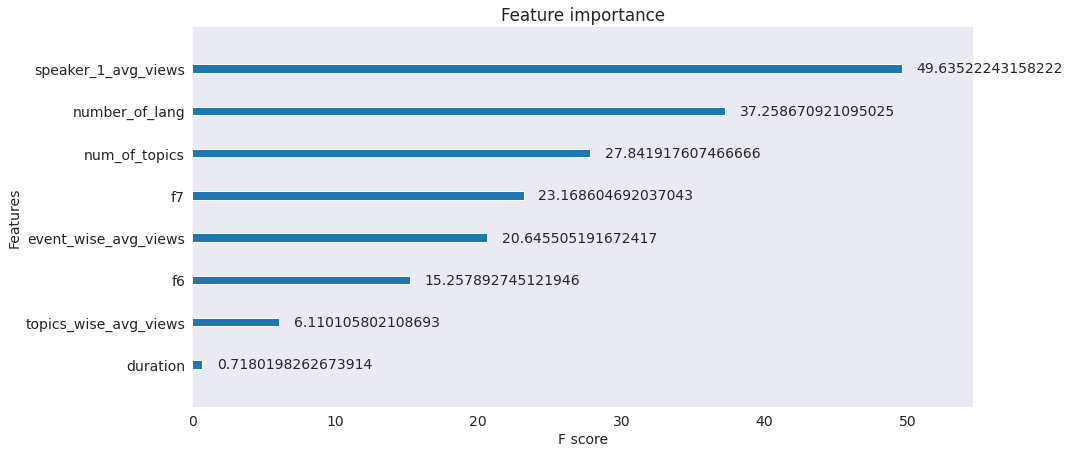

In [ ]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14,7)
plt.figure(figsize= (10,4))
plot_importance(xgb_model, importance_type = 'gain', grid= False)

# Catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(iterations=50,
                          learning_rate=0.6,
                          depth=10)
model.fit(X_train, y_train)

0:	learn: 0.7326534	total: 16.7ms	remaining: 818ms
1:	learn: 0.5455637	total: 31.5ms	remaining: 757ms
2:	learn: 0.4545648	total: 45.6ms	remaining: 715ms
3:	learn: 0.3936618	total: 59.8ms	remaining: 688ms
4:	learn: 0.3572513	total: 73.7ms	remaining: 664ms
5:	learn: 0.3353780	total: 87.8ms	remaining: 644ms
6:	learn: 0.3171917	total: 102ms	remaining: 628ms
7:	learn: 0.2807313	total: 116ms	remaining: 611ms
8:	learn: 0.2646069	total: 130ms	remaining: 593ms
9:	learn: 0.2506043	total: 144ms	remaining: 576ms
10:	learn: 0.2416100	total: 159ms	remaining: 563ms
11:	learn: 0.2332904	total: 173ms	remaining: 548ms
12:	learn: 0.2228199	total: 189ms	remaining: 537ms
13:	learn: 0.2114558	total: 203ms	remaining: 522ms
14:	learn: 0.2014849	total: 220ms	remaining: 512ms
15:	learn: 0.1851814	total: 233ms	remaining: 496ms
16:	learn: 0.1847796	total: 235ms	remaining: 456ms
17:	learn: 0.1788435	total: 249ms	remaining: 442ms
18:	learn: 0.1671459	total: 263ms	remaining: 428ms
19:	learn: 0.1633319	total: 276ms	r

In [ ]:
cat_y_train_pred= model.predict(X_train)
cat_y_test_pred= model.predict(X_test)

In [ ]:
cat_boost_r2_test = r2_score(y_test,cat_y_test_pred)
cat_boost_r2_test

0.8189140248690157

In [ ]:
cat_boost_r2_train=r2_score(y_train, cat_y_train_pred)
cat_boost_r2_train

0.9965768354591866

In [ ]:
mean_absolute_error(y_train,cat_y_train_pred)

0.039386241533520015

In [ ]:
mean_absolute_error(y_test, cat_y_test_pred)

0.13374354988423143

In [ ]:
cat_rmse_train = math.sqrt(mean_squared_error(y_train,cat_y_train_pred))
cat_rmse_train

0.06019438008348462

In [ ]:
cat_rmse_test = math.sqrt(mean_squared_error(y_test,cat_y_test_pred))
cat_rmse_test

0.37215554814784363

# Continue:

**Plotting the correlation matrix.**

In [ ]:
X=pd.DataFrame(X)

In [ ]:
X.columns=['duration', 'speaker_1_avg_views', 'event_wise_avg_views','number_of_lang', 'num_of_topics', 'topics_wise_avg_views']

AttributeError: ignored

In [ ]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

###**Applying train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Let's try to build a baseline model and we can improve from there.**

#**7. Fitting the regression models and HyperParameter Tuning**


##**7.1 Let's apply linear regression model.**

In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

* **Despite of the fact that our features are not following linear assumption which we have checked earlier, this model is giving a satisfactory score.**

##**7.2 Random Forest Regressor**

In [ ]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

* **It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.**

**Defining Parameter Dict for Hyperparameter Tuning**

In [ ]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

**1. Hyperparameter Tuning using Randomized Search CV**

In [ ]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_

In [ ]:
rf_optimal_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.13
Test MAE: 0.12


In [ ]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.5026389648341149
For test set the R_Squared for RFforest is 0.6844469535667226 and adjusted R_Squared is 0.6838152157360253


###**Let's plot all the scores of rf_optimal_model together.**

In [ ]:
#Defining the model
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)]
      ]
#Let's run the the model and store the results in a dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,0.127342,0.115492,0.522206,0.698153,0.711152,0.480481


###**Let's plot the feature importance score w.r.t. RF model**

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

AttributeError: ignored

* **speaker_avg_views is the most important feature in RandomForestregressor followed by event_wise_avg_views.**

##**7.3 Applying XGboost regressor model**

In [ ]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

In [ ]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:
xgb_optimal_model

In [ ]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

In [ ]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

###**Let's plot all the scores of xgb_optimal_model together.**

In [ ]:
#Defining the model
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]         
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

###**Let's plot the feature importance score w.r.t. XGBregressor model**

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

* **speaker1_avg_views is the most important feature in XGBregressor model followed by event_wise_avg_views.**

##**7.4 Let's try ExtraTreesRegressor.**

In [ ]:
et = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

**Hyperparameter Tuning using Randomized Search CV**

In [ ]:
#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

In [ ]:
et_optimal_model = et_random.best_estimator_

In [ ]:
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

In [ ]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

###**Let's plot all the scores of et_optimal_model together.**

In [ ]:
#Defining the model
model = [
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_et = pd.DataFrame(model_data)
#printing the results_df_et
results_df_et

**Let's plot the feature importance score w.r.t. ExtraTreesRegressor model**

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

* **speaker1_avg_views is the most important feature in RandomForestregressor followed by comments.**

* **In all the models speaker_1_avg_views is impacting the much.**

#**NATURAL LANGUAGE PROCESSING**

In [ ]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/Capstone 3-Ted_Talk_Views_Prediction/Copy of cleaned_data.csv'
r_data = pd.read_csv(filepath)

In [ ]:
r_data.head(2)

,talk_id,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,daily_views,topics_string,text_corpus
0,1,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,Nobel Laureate Al Gore focused the world’s att...,climate advocate,"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,696.735614,alternative energy cars climate change culture...,alternative energy cars climate change cultur...
1,92,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"In Hans Rosling’s hands, data sings. Global tr...",global health expert; data visionary,"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days,2867.645837,Africa Asia Google demo economics global issue...,Africa Asia Google demo economics global issu...


In [ ]:
def msg_cleaning(msg):
  punc_remove = [ char for char in msg if char not in string.punctuation]
  punc_remove_joined = ''.join(punc_remove)
  msg_cleaned = [word for word in punc_remove_joined.split() if word.lower() not in stopwords.words('english')]
  return msg_cleaned

In [ ]:
text_nlp= r_data[['title', 'about_speakers', 'occupations', 'transcript', 'description', 'topics_string', 'text_corpus']]

In [ ]:
title_clean = text_nlp['title'].apply(msg_cleaning)

Total 164855 words in the title.


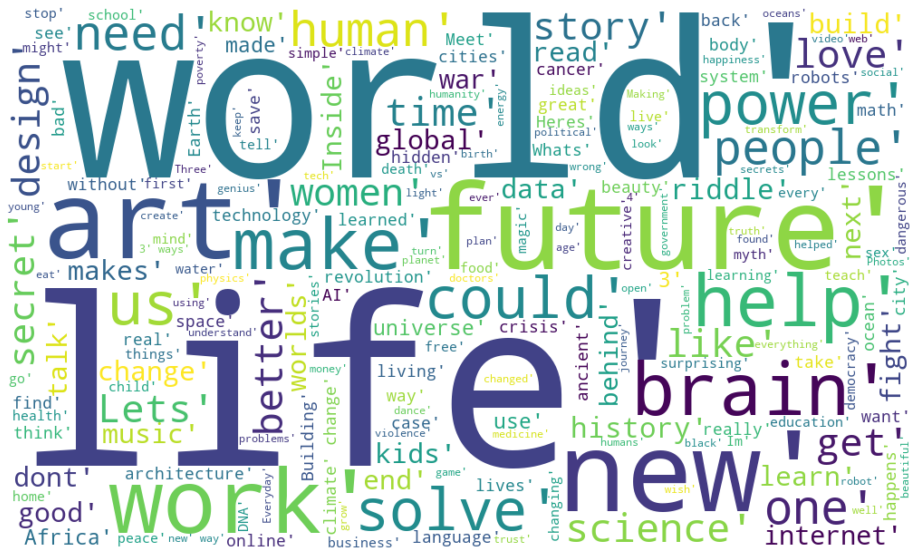

In [ ]:
final_text = " ".join(topic for topic in title_clean.astype(str))
print("Total {} words in the title.".format(len(final_text)))

wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(final_text)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
X = r_data['occupations']
df1_clean = X.apply(msg_cleaning)

Total 94748 words in the title.


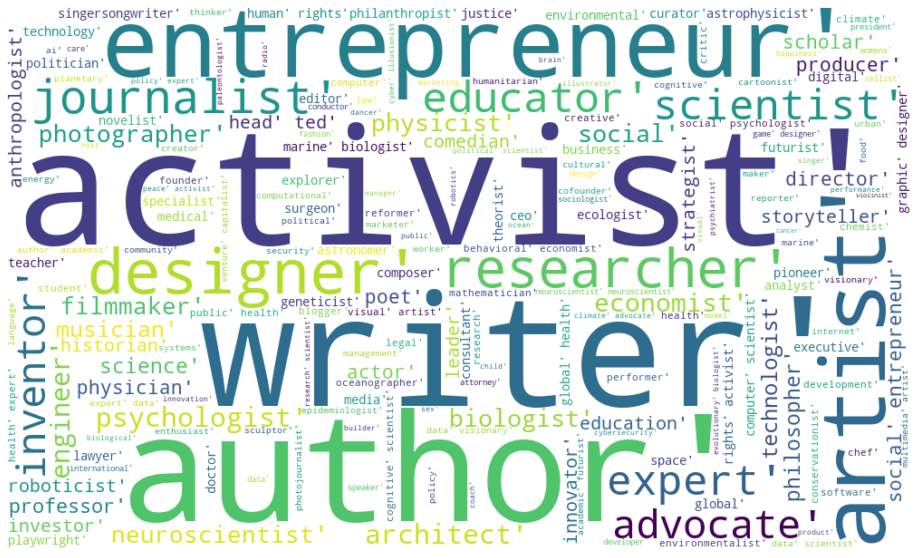

In [ ]:
final_text = " ".join(topic for topic in df1_clean.astype(str))
print("Total {} words in the title.".format(len(final_text)))

wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(final_text)

plt.axis("off")
# plt.rcParams["figure.figsize"] = (25,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
X = r_data['topics_string']
df1_clean = X.apply(msg_cleaning)

Total 417234 words in the title.


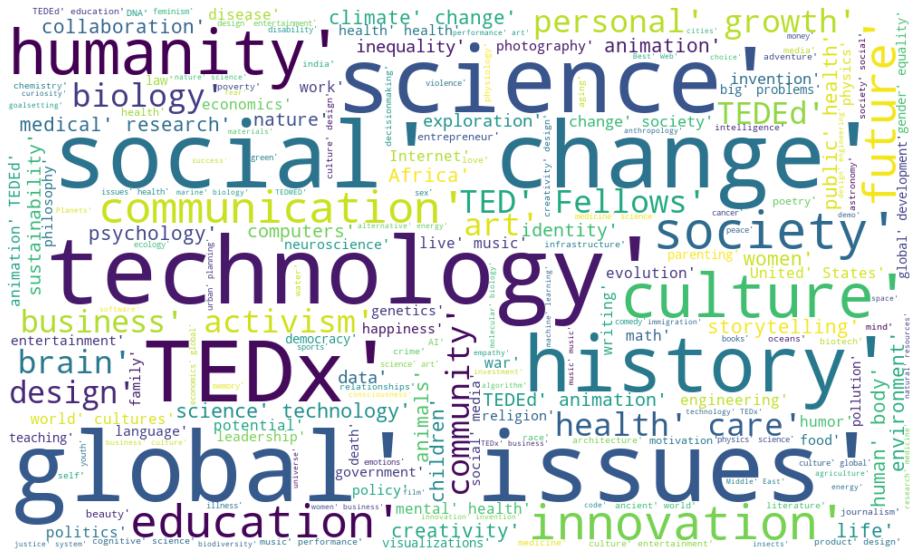

In [ ]:
final_text = " ".join(topic for topic in df1_clean.astype(str))
print("Total {} words in the title.".format(len(final_text)))

wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(final_text)

plt.axis("off")
# plt.rcParams["figure.figsize"] = (25,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#**8. Comparison of different regressor Models**

##**The ML regressor models that we have used are :**

* Lasso Regressor
* Ridge Regressor
* KNearestNeighbors Regressor
* Random Forest Regressor
* Extra Tree Regressor
* Gradient Boosting Regressor
* XGB Regressor







* **Let's try all these models together and store the scores in a new dataframe.**

In [ ]:
#Defining all these models
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]          
        ]

In [ ]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[14:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Lasso:,271274.111668,264440.174911,0.815987,0.818812,472949.076161,469188.059992
1,Ridge:,271268.806893,264431.235192,0.815987,0.818815,472949.080194,469185.219289
2,KNeighborsRegressor:,231054.636746,281932.195424,0.856594,0.783506,417516.848940,512868.181145
3,RandomForest,186583.315347,191844.536467,0.806193,0.803246,485371.330401,488927.132141
4,ExtraTreeRegressor :,207304.048833,204793.751052,0.796536,0.806390,497317.341381,485005.015211
5,GradientBoostingRegressor:,185605.875057,229700.882687,0.898735,0.833019,350848.278702,450418.365989
6,XGBRegressor:,164091.332037,226944.860549,0.918158,0.830151,315411.385197,454270.753145


#**9. Final selection of the model**

**We choose MAE and not RMSE as the deciding factor of our model selection  because of the following reasons:**

* **RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.**
* **MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.**

* **The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.**

In [ ]:
#let's print the scores of Random Forest Regressor model 
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186861.805466,192467.510883,0.806411,0.802745,485098.804013,489550.09742


In [ ]:
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


* **For Random Forest Regressor model, MAE is around 12 % of target variable mean.**

#**10. Conclusion**
###That's it! We reached the end of our exercise.
###Started with loading the data so far we have done EDA ,feature engineering , data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.

###So far we have modelled on 
* **Lasso Regressor**
* **Ridge Regressor**
* **KNearestNeighbors Imputer**
* **Random Forest Regressor**
* **Extra Tree Regressor**
* **Gradient Boosting Regressor**
* **XGB Regressor**

###In all of these models our errors have been in the range of 2,00,000 which is around 10% of the average views. We have been able to correctly predict views 90% of the time.
###After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate.
###Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection,correct model selection,etc.

###Out of all these models RandomForestRegressor is the best performer in terms of MAE.
###In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.

#**Future Work**
###We can do a dynamic regression time series modelling due to the availability of the time features.
###We can use topic modelling to tackle views in each topic separately.

---
That's all..!!
---